In [373]:
import pandas as pd

df = pd.read_csv(r'/content/cirrhosis.csv')

In [374]:
# Print column names
print(df.columns)

# Print first few rows of the DataFrame
print(df.head())

Index(['ID', 'N_Days', 'Status', 'Drug', 'Age', 'Sex', 'Ascites',
       'Hepatomegaly', 'Spiders', 'Edema', 'Bilirubin', 'Cholesterol',
       'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets',
       'Prothrombin', 'Stage'],
      dtype='object')
   ID  N_Days Status             Drug    Age Sex Ascites Hepatomegaly Spiders  \
0   1     400      D  D-penicillamine  21464   F       Y            Y       Y   
1   2    4500      C  D-penicillamine  20617   F       N            Y       Y   
2   3    1012      D  D-penicillamine  25594   M       N            N       N   
3   4    1925      D  D-penicillamine  19994   F       N            Y       Y   
4   5    1504     CL          Placebo  13918   F       N            Y       Y   

  Edema  Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos    SGOT  \
0     Y       14.5        261.0     2.60   156.0    1718.0  137.95   
1     N        1.1        302.0     4.14    54.0    7394.8  113.52   
2     S        1.4        176.0   

In [375]:
df['Age'] = (df['Age']/365).round(0)
print(df['Age'])

0      59.0
1      56.0
2      70.0
3      55.0
4      38.0
       ... 
413    67.0
414    39.0
415    57.0
416    58.0
417    53.0
Name: Age, Length: 418, dtype: float64


In [376]:
# Check for null values
null_values = df.isnull().sum()

# Print the result
print(null_values)

ID                 0
N_Days             0
Status             0
Drug             106
Age                0
Sex                0
Ascites          106
Hepatomegaly     106
Spiders          106
Edema              0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64


**Filling the missing values**

In [377]:
# Categorical Missing Values Filled Using Mode Values
df['Drug'].fillna('D-penicillamine', inplace=True)
df['Ascites'].fillna('N', inplace=True)
df['Hepatomegaly'].fillna('Y', inplace=True)
df['Spiders'].fillna('N', inplace=True)
df['Stage'].fillna(3.0, inplace=True)

# Numerical Missing Values Filled Using Median Values
df['Cholesterol'].fillna(309.5, inplace=True)
df['Copper'].fillna(73, inplace=True)
df['Alk_Phos'].fillna(1259, inplace=True)
df['SGOT'].fillna(114.7, inplace=True)
df['Tryglicerides'].fillna(108, inplace=True)
df['Platelets'].fillna(251, inplace=True)
df['Prothrombin'].fillna(10.60, inplace=True)

In [378]:
# Check for null values
new_null = df.isnull().sum()
print("Number of null values for each column: ", new_null)

print(df)

Number of null values for each column:  ID               0
N_Days           0
Status           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64
      ID  N_Days Status             Drug   Age Sex Ascites Hepatomegaly  \
0      1     400      D  D-penicillamine  59.0   F       Y            Y   
1      2    4500      C  D-penicillamine  56.0   F       N            Y   
2      3    1012      D  D-penicillamine  70.0   M       N            N   
3      4    1925      D  D-penicillamine  55.0   F       N            Y   
4      5    1504     CL          Placebo  38.0   F       N            Y   
..   ...     ...    ...              ...   ...  ..     ...          ...   
413  414     681      D  D-penicillamine  

**Data preprocessing**

**1. Box Plot**

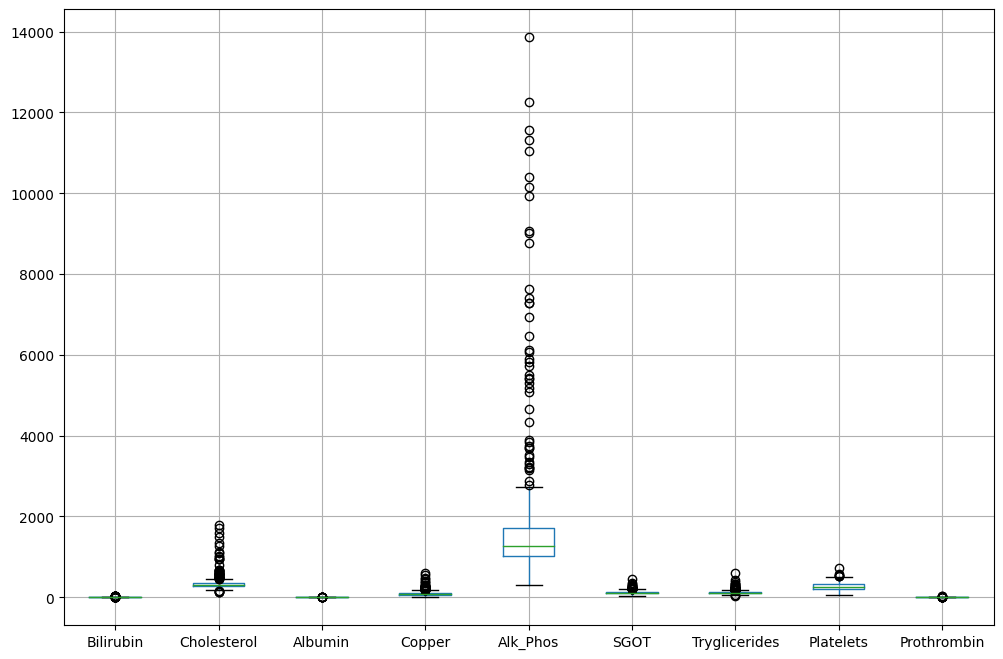

In [379]:
import matplotlib.pyplot as plt

numeric_columns = df.iloc[:, 10:19]

# Create a box plot and increase the size
plt.figure(figsize=(12, 8))  # Width: 12, Height: 8
numeric_columns.boxplot()
plt.show()

**2. IQR**

In [380]:
# Select columns with indices 10 to 19
numeric_columns = df.iloc[:, 10:20]

# Calculate the IQR for each numeric column
Q1 = numeric_columns.quantile(0.25)
Q3 = numeric_columns.quantile(0.75)
IQR = Q3 - Q1

# Identify outliers using the IQR method
outliers_iqr = ((numeric_columns < (Q1 - 1.5 * IQR)) | (numeric_columns > (Q3 + 1.5 * IQR))).any(axis=1)

# Print the rows containing outliers
print("Rows with outliers based on IQR:")
print(df[outliers_iqr])


Rows with outliers based on IQR:
      ID  N_Days Status             Drug   Age Sex Ascites Hepatomegaly  \
0      1     400      D  D-penicillamine  59.0   F       Y            Y   
1      2    4500      C  D-penicillamine  56.0   F       N            Y   
2      3    1012      D  D-penicillamine  70.0   M       N            N   
3      4    1925      D  D-penicillamine  55.0   F       N            Y   
6      7    1832      C          Placebo  56.0   F       N            Y   
..   ...     ...    ...              ...   ...  ..     ...          ...   
381  382     221      D  D-penicillamine  51.0   F       N            Y   
385  386    1654      C  D-penicillamine  54.0   M       N            Y   
386  387    1653      C  D-penicillamine  49.0   F       N            Y   
397  398    1375      C  D-penicillamine  62.0   F       N            Y   
398  399    1260      C  D-penicillamine  42.0   F       N            Y   

    Spiders Edema  Bilirubin  Cholesterol  Albumin  Copper  Alk_Ph

# **EDA**

In [381]:
# Summary statistics

df.describe()

,ID,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,209.500000,1917.782297,50.772727,3.220813,350.272727,3.497440,91.279904,1799.144976,120.564067,119.267943,256.866029,10.731100,3.023923
std,120.810458,1104.672992,10.442880,4.407506,193.123893,0.424972,74.485481,1875.121982,49.085094,54.050691,97.024861,1.019587,0.875678
min,1.000000,41.000000,26.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,105.250000,1092.750000,43.000000,0.800000,273.000000,3.242500,51.250000,1016.250000,91.000000,95.000000,190.000000,10.000000,2.000000
50%,209.500000,1730.000000,51.000000,1.400000,309.500000,3.530000,73.000000,1259.000000,114.700000,108.000000,251.000000,10.600000,3.000000
75%,313.750000,2613.500000,58.000000,3.400000,347.750000,3.770000,100.750000,1707.750000,135.750000,127.750000,315.500000,11.100000,4.000000
max,418.000000,4795.000000,78.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,721.000000,18.000000,4.000000


In [382]:
df.describe(exclude='number').T

,count,unique,top,freq
Status,418,3,C,232
Drug,418,2,D-penicillamine,264
Sex,418,2,F,374
Ascites,418,2,N,394
Hepatomegaly,418,2,Y,266
Spiders,418,2,N,328
Edema,418,3,N,354


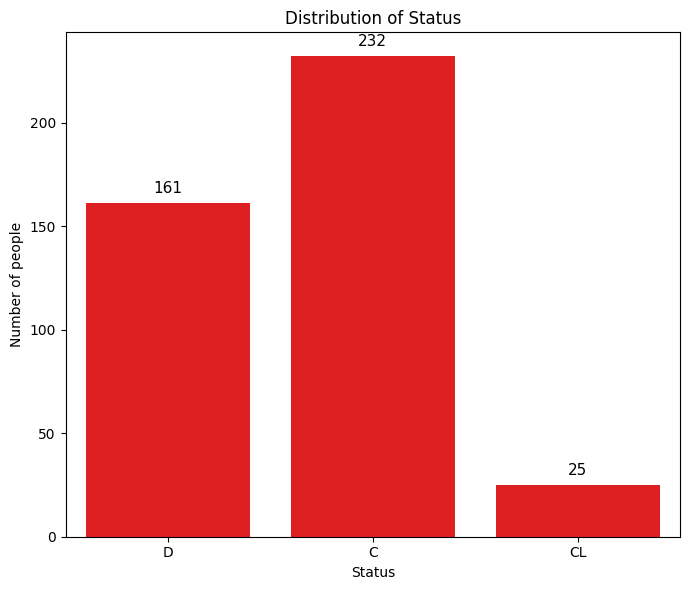

In [383]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count plot for the variable 'Status'
plt.figure(figsize=(7, 6))
ax = sns.countplot(x='Status', data=df, color='red')  # Adjust color as per your preference

# Add counts above the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('Distribution of Status')
plt.ylabel('Number of people')
plt.xlabel('Status')
plt.tight_layout()
plt.show()


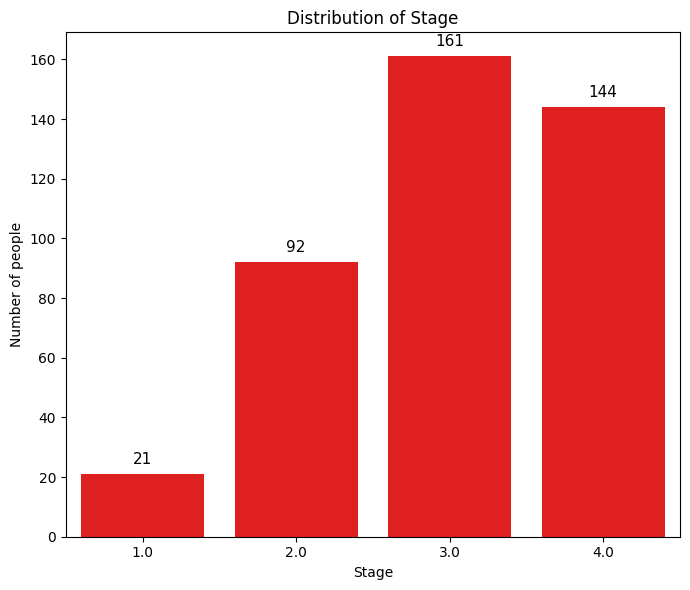

In [384]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count plot for the target variable 'Stage'
plt.figure(figsize=(7, 6))
ax = sns.countplot(x='Stage', data=df, color='red')

# Add counts above the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('Distribution of Stage')
plt.ylabel('Number of people')
plt.xlabel('Stage')
plt.tight_layout()
plt.show()


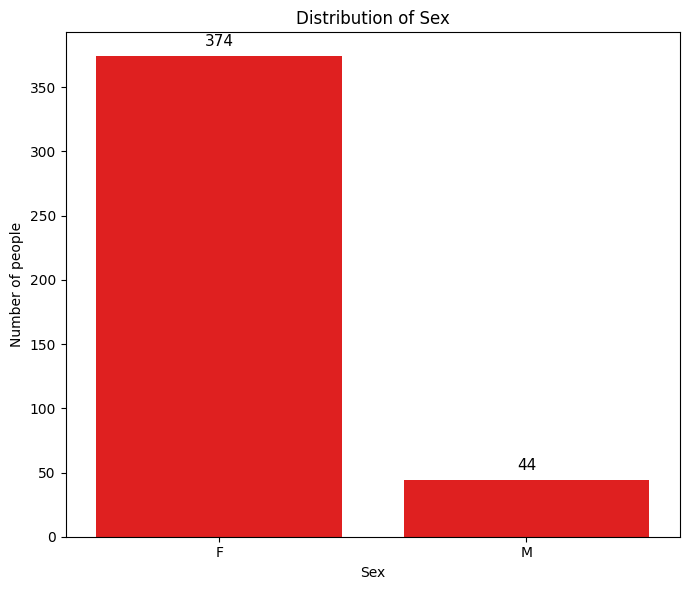

In [385]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the count plot
plt.figure(figsize=(7, 6))
ax = sns.countplot(x='Sex', data=df, color='red')

# Add counts above the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('Distribution of Sex')
plt.ylabel('Number of people')
plt.xlabel('Sex')
plt.tight_layout()
plt.show()


<ipython-input-386-666db05d8c0f>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='Drug', palette='viridis')


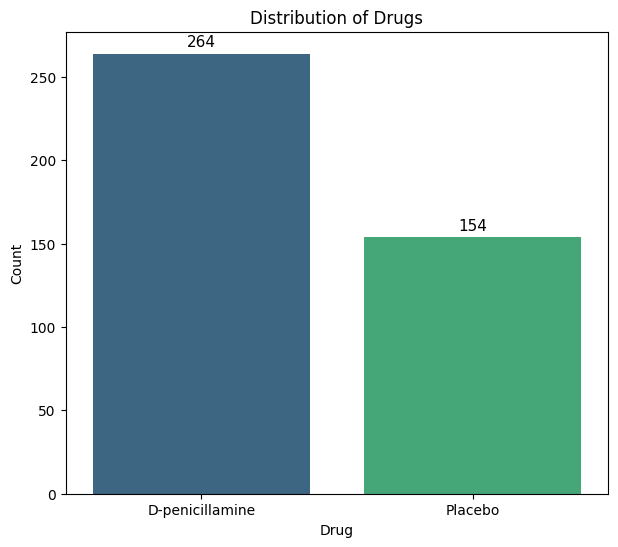

In [386]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame and 'Drug' is the column of interest
plt.figure(figsize=(7, 6))
ax = sns.countplot(data=df, x='Drug', palette='viridis')

# Add counts above the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('Distribution of Drugs')
plt.xlabel('Drug')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


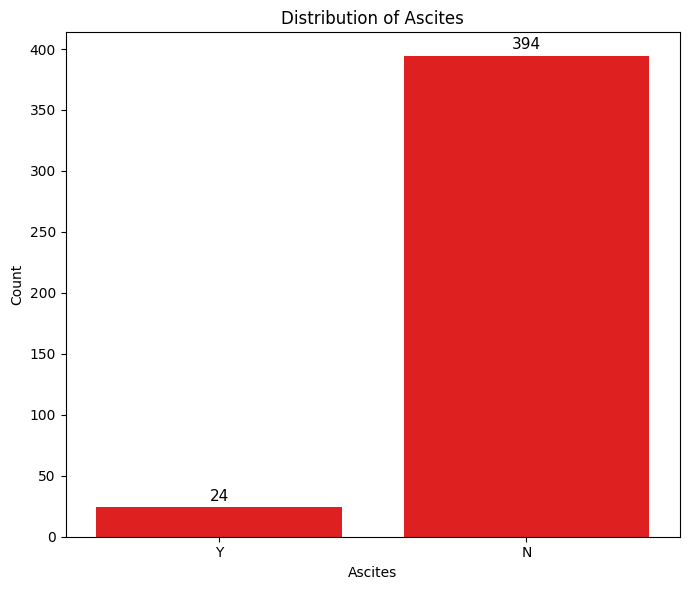

In [387]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7, 6))
ax = sns.countplot(data=df, x='Ascites', color='red')

# Add counts above the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('Distribution of Ascites')
plt.xlabel('Ascites')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


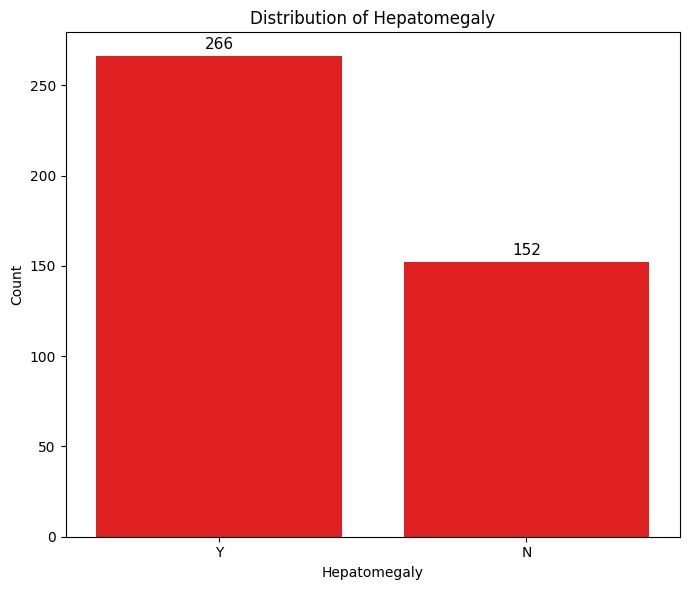

In [388]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7, 6))
ax = sns.countplot(data=df, x='Hepatomegaly', color='red')

# Add counts above the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('Distribution of Hepatomegaly')
plt.xlabel('Hepatomegaly')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


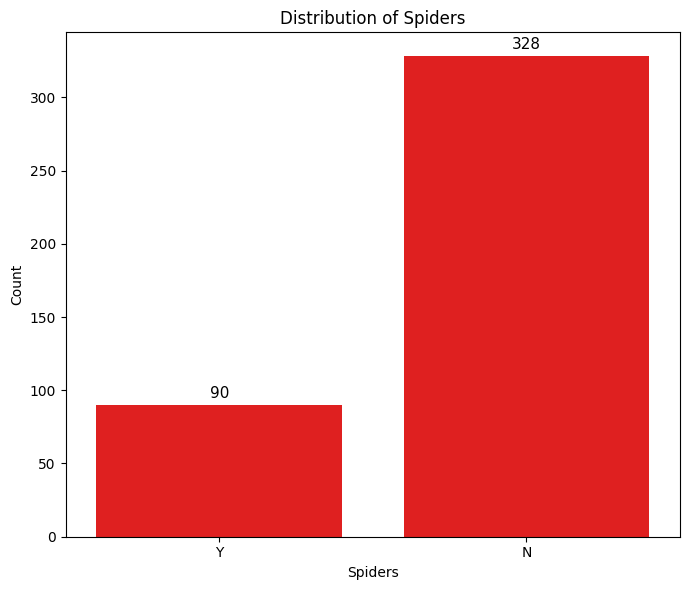

In [389]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7, 6))
ax = sns.countplot(data=df, x='Spiders', color='red')

# Add counts above the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('Distribution of Spiders')
plt.xlabel('Spiders')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


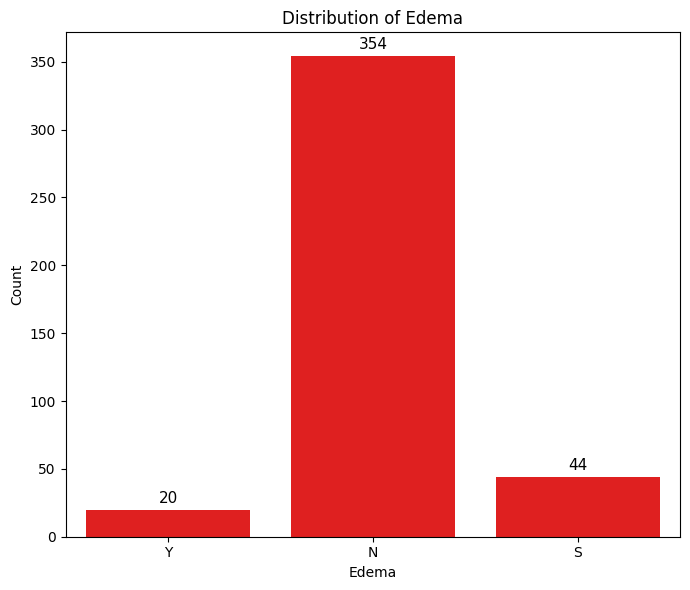

In [390]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7, 6))
ax = sns.countplot(data=df, x='Edema', color='red')

# Add counts above the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('Distribution of Edema')
plt.xlabel('Edema')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


**Encoding string to numerical values**

In [391]:
df['Status'].replace({'C': 0, 'CL': 1, 'D': 2}, inplace=True)
df['Drug'].replace({'D-penicillamine': 0, 'Placebo': 1}, inplace=True)
df['Sex'].replace({'F': 0, 'M': 1}, inplace=True)
df['Ascites'].replace({'N': 0, 'Y': 1}, inplace=True)
df['Hepatomegaly'].replace({'N': 0, 'Y': 1}, inplace=True)
df['Spiders'].replace({'N': 0, 'Y': 1}, inplace=True)
df['Edema'].replace({'N': 0, 'S': 1, 'Y': 2}, inplace=True)

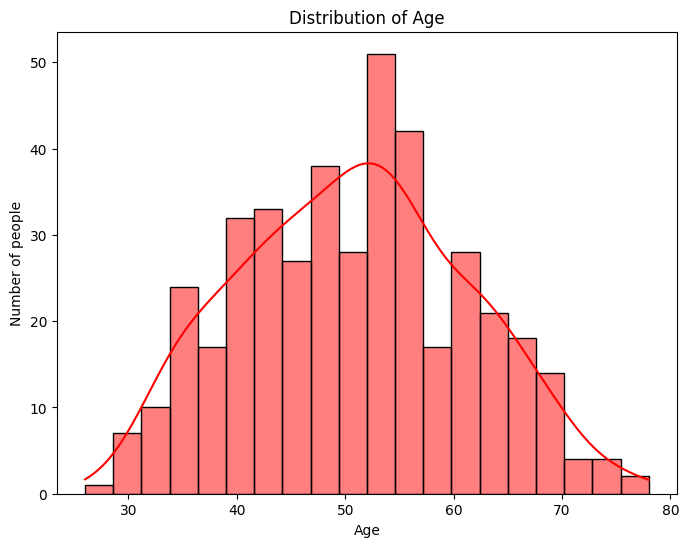

In [392]:
# Example: Histogram for Age
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], bins=20, kde=True, color='red')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Number of people')
plt.show()

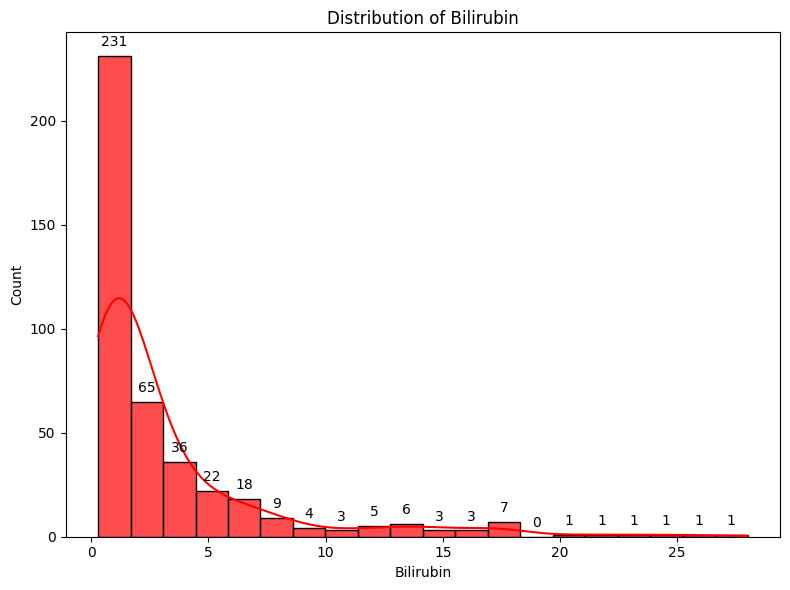

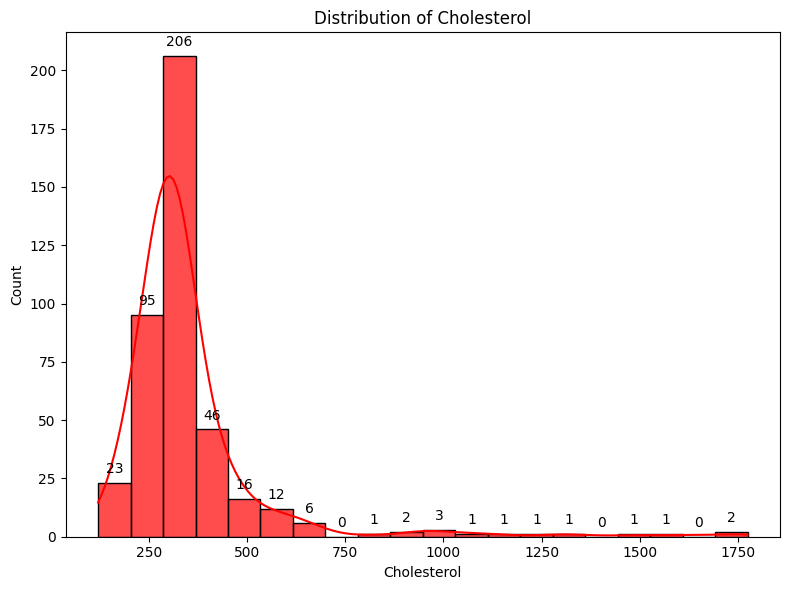

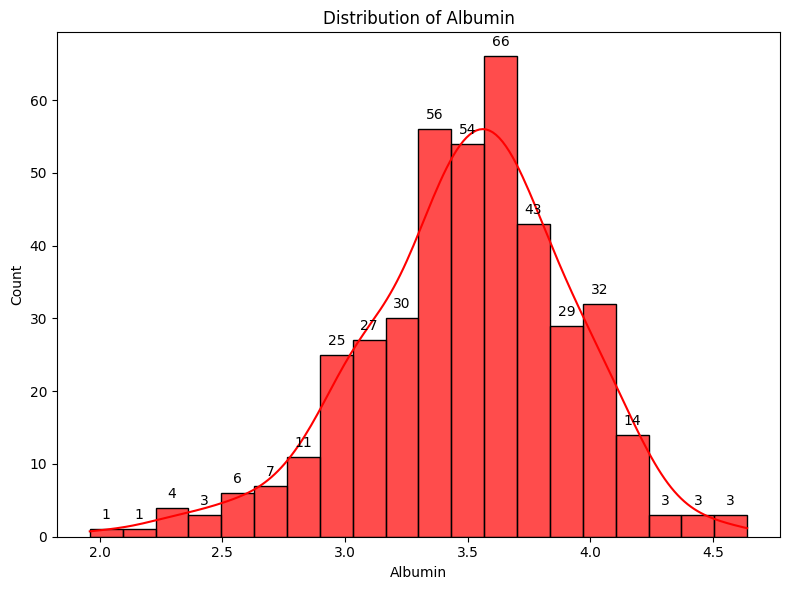

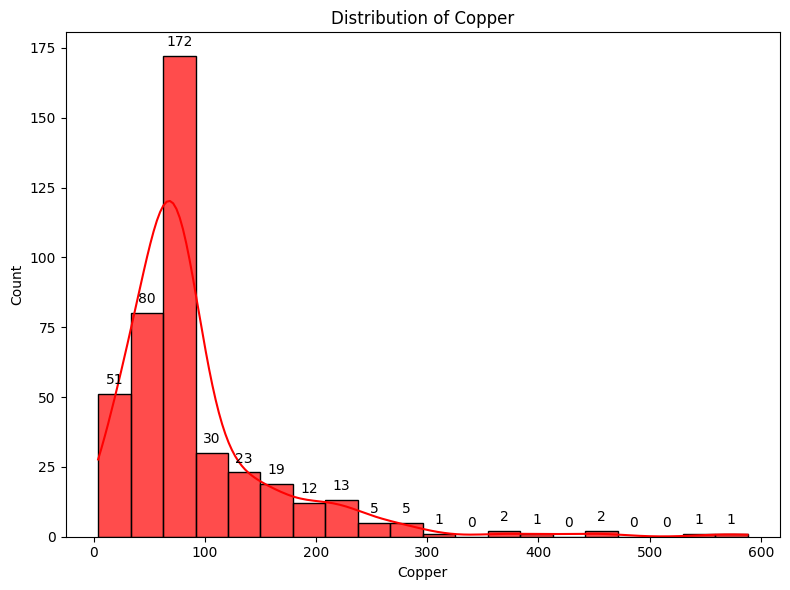

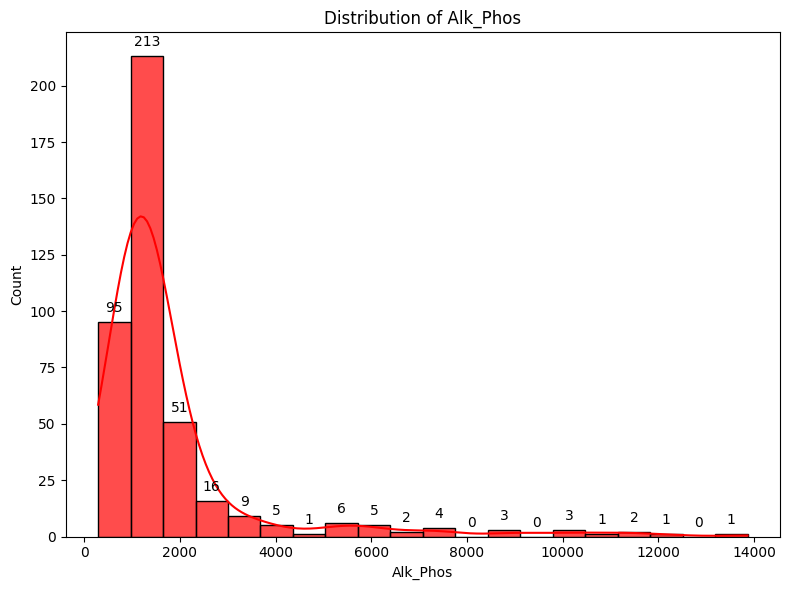

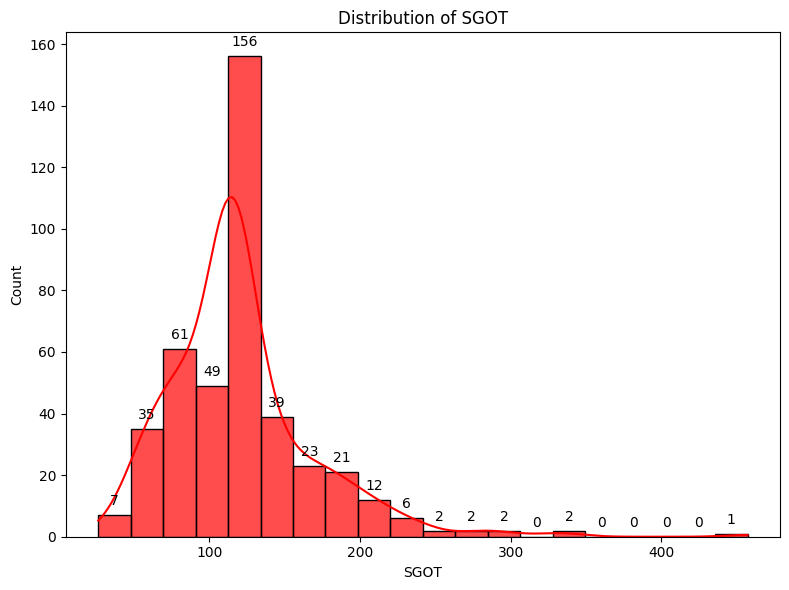

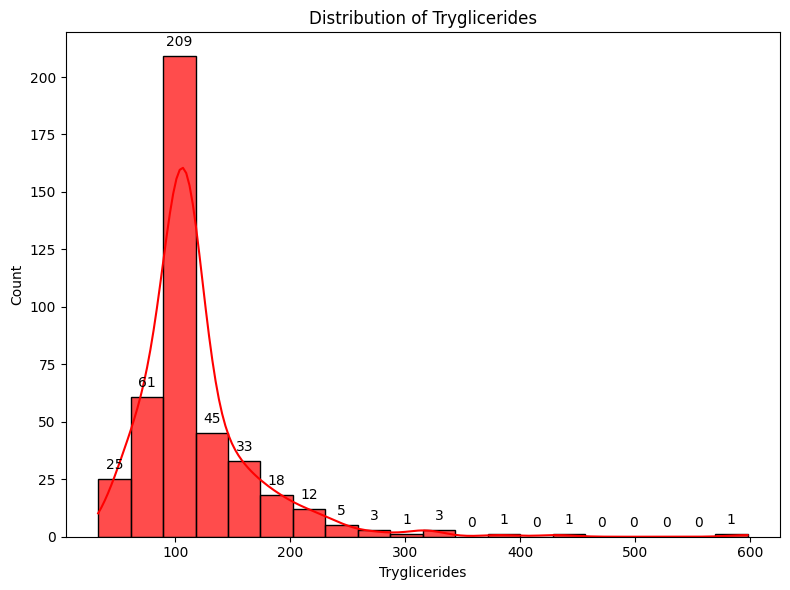

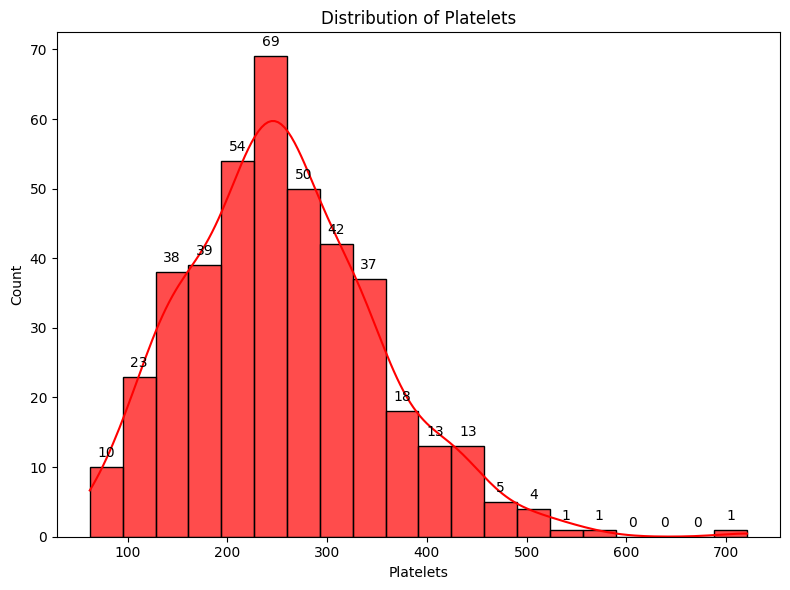

In [393]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical columns to visualize
numerical_cols = ['Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets']

# Create individual histograms with annotations
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], kde=True, bins=20, color='red', alpha=0.7)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

    # Annotate each bin with its count
    for p in plt.gca().patches:
        plt.gca().annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                           ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                           textcoords='offset points')

    plt.tight_layout()
    plt.show()


In [394]:
print(df.columns)

Index(['ID', 'N_Days', 'Status', 'Drug', 'Age', 'Sex', 'Ascites',
       'Hepatomegaly', 'Spiders', 'Edema', 'Bilirubin', 'Cholesterol',
       'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets',
       'Prothrombin', 'Stage'],
      dtype='object')


**Distribution of Stage wrt different features**

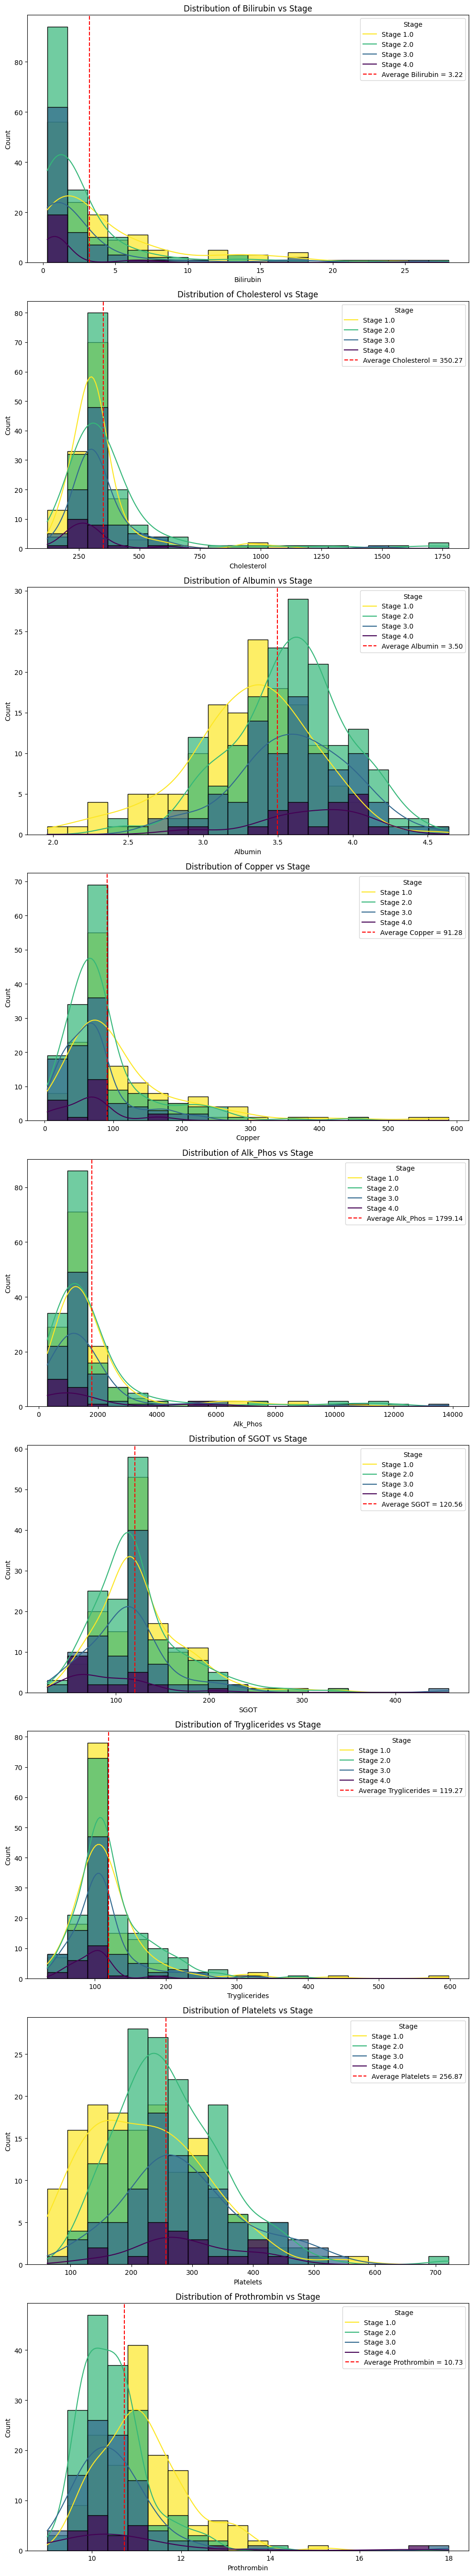

In [395]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical columns to visualize (replace with your actual column names)
numerical_cols = ['Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']

# Number of rows and columns for subplots
rows = len(numerical_cols)
cols = 1  # We will create one column of plots

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(10, 6 * rows))

# Loop through each numerical column and create distribution plots
for i, col in enumerate(numerical_cols):
    sns.histplot(data=df, x=col, hue='Stage', kde=True, ax=axes[i], palette='viridis', alpha=0.7, bins=20)

    # Calculate the mean
    mean_val = df[col].mean()

    # Add a vertical line for the mean
    axes[i].axvline(x=mean_val, color='red', linestyle='--', label=f'Mean = {mean_val:.2f}')

    axes[i].set_title(f'Distribution of {col} vs Stage')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    axes[i].legend(title='Stage', labels=[f'Stage {j}' for j in sorted(df['Stage'].unique())] + [f'Average {col} = {mean_val:.2f}'])

plt.tight_layout()
plt.show()


**Distribution of gender over cholesterol**

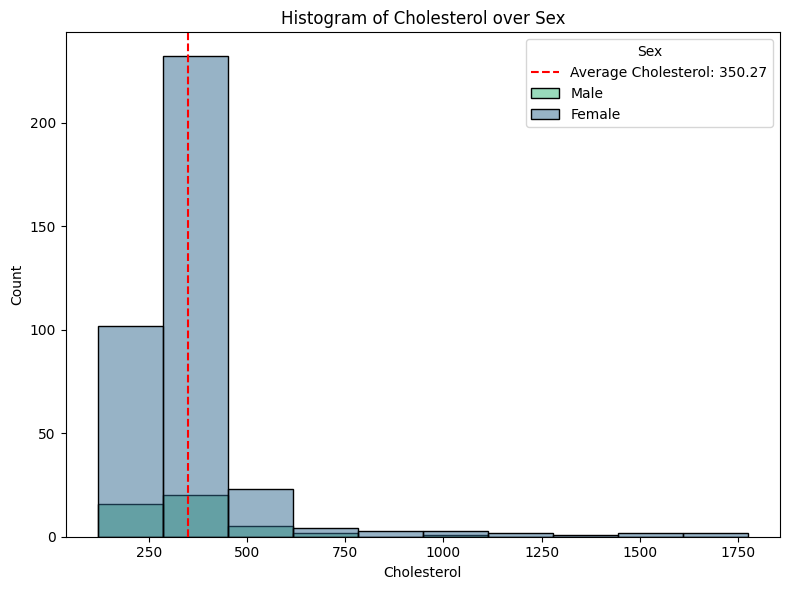

In [396]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Plotting the histogram of 'Cholesterol' over 'Gender' (Sex)
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Cholesterol', hue='Sex', kde=False, palette='viridis', bins=10)
plt.title('Histogram of Cholesterol over Sex')
plt.xlabel('Cholesterol')
plt.ylabel('Count')

# Calculate average cholesterol
avg_chol = np.mean(df['Cholesterol'])

# Plot vertical line for average cholesterol
plt.axvline(x=avg_chol, color='red', linestyle='--', label=f'Average Cholesterol: {avg_chol:.2f}')

plt.legend(title='Sex', labels=[f'Average Cholesterol: {avg_chol:.2f}', 'Male', 'Female'])
plt.tight_layout()
plt.show()


**Distribution of age over gender**

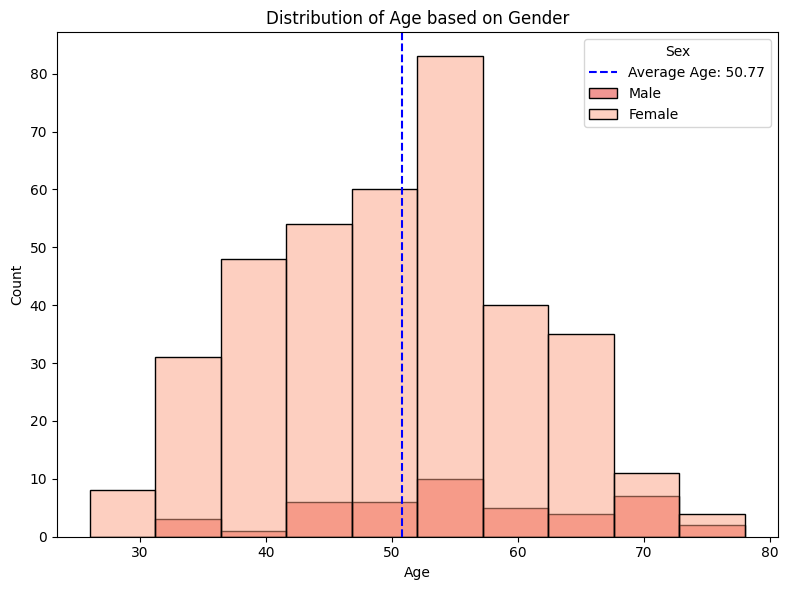

In [397]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Calculate average age
avg_age = df['Age'].mean()

# Plotting the histogram of 'Age' based on 'Sex' (gender)
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Age', hue='Sex', kde=False, palette='Reds', bins=10)
plt.axvline(x=avg_age, color='blue', linestyle='--', label=f'Average Age: {avg_age:.2f}')
plt.title('Distribution of Age based on Gender')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Sex', labels=[f'Average Age: {avg_age:.2f}', 'Male', 'Female', ])
plt.tight_layout()
plt.show()



**Correlation matrix**

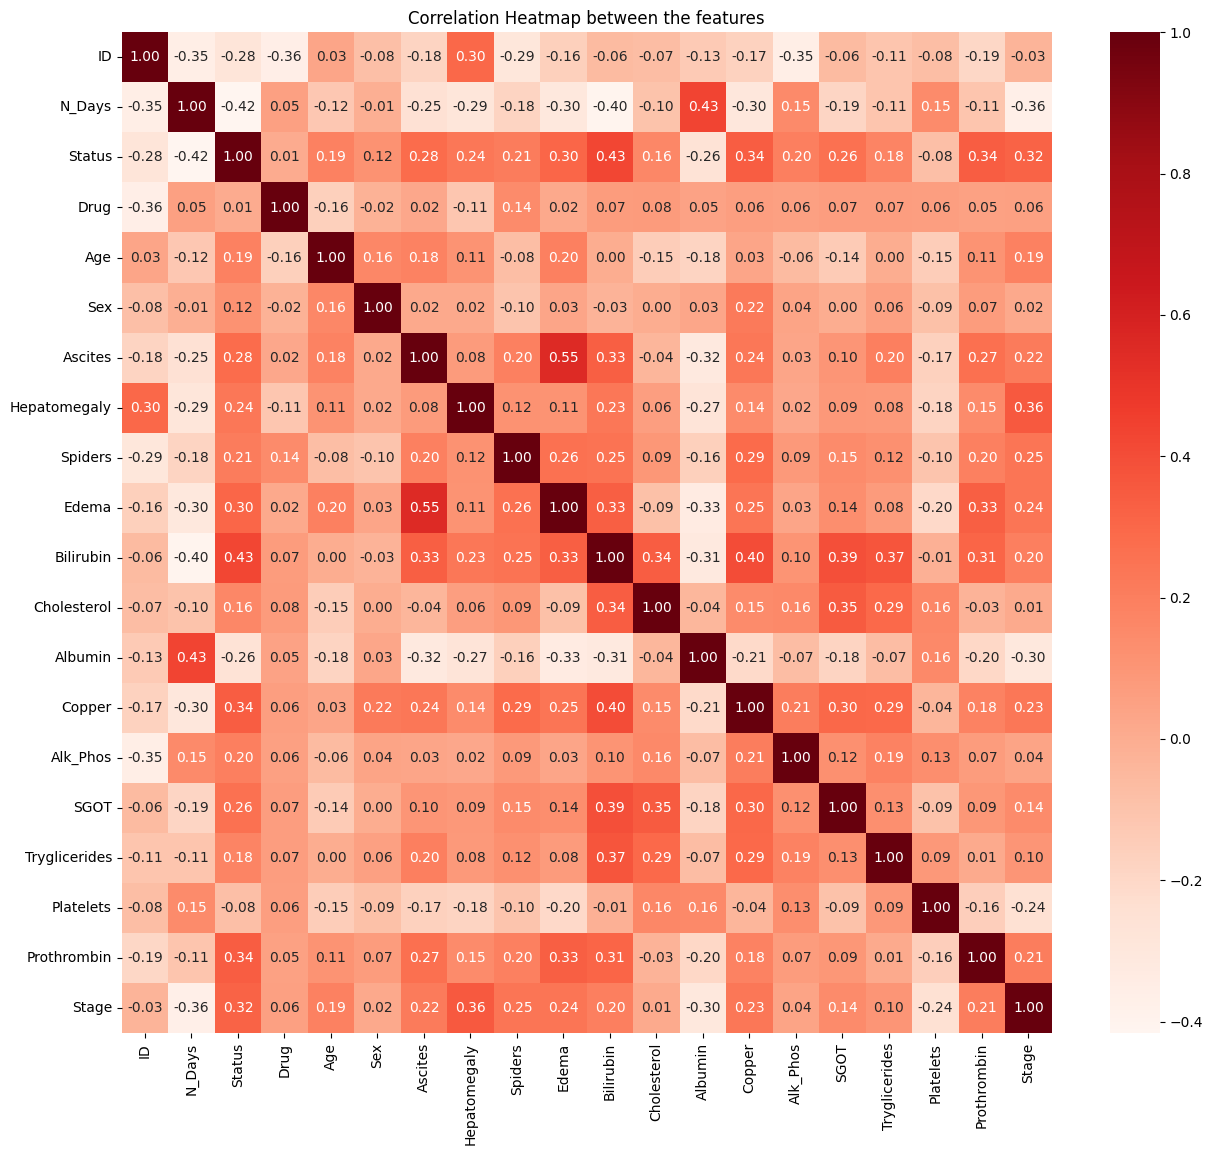

In [398]:
# Example: Correlation heatmap

# Calculate the correlation matrix for selected columns
corr_matrix = df.corr()

# Plot the correlation heatmap
plt.figure(figsize=(15, 13))
sns.heatmap(corr_matrix, annot=True, cmap='Reds', fmt=".2f")
plt.title('Correlation Heatmap between the features')
plt.show()


**Feature selection process (Additional)**

<ipython-input-399-22bd7546e68e>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Score', y='Feature', data=feature_scores, palette='viridis')


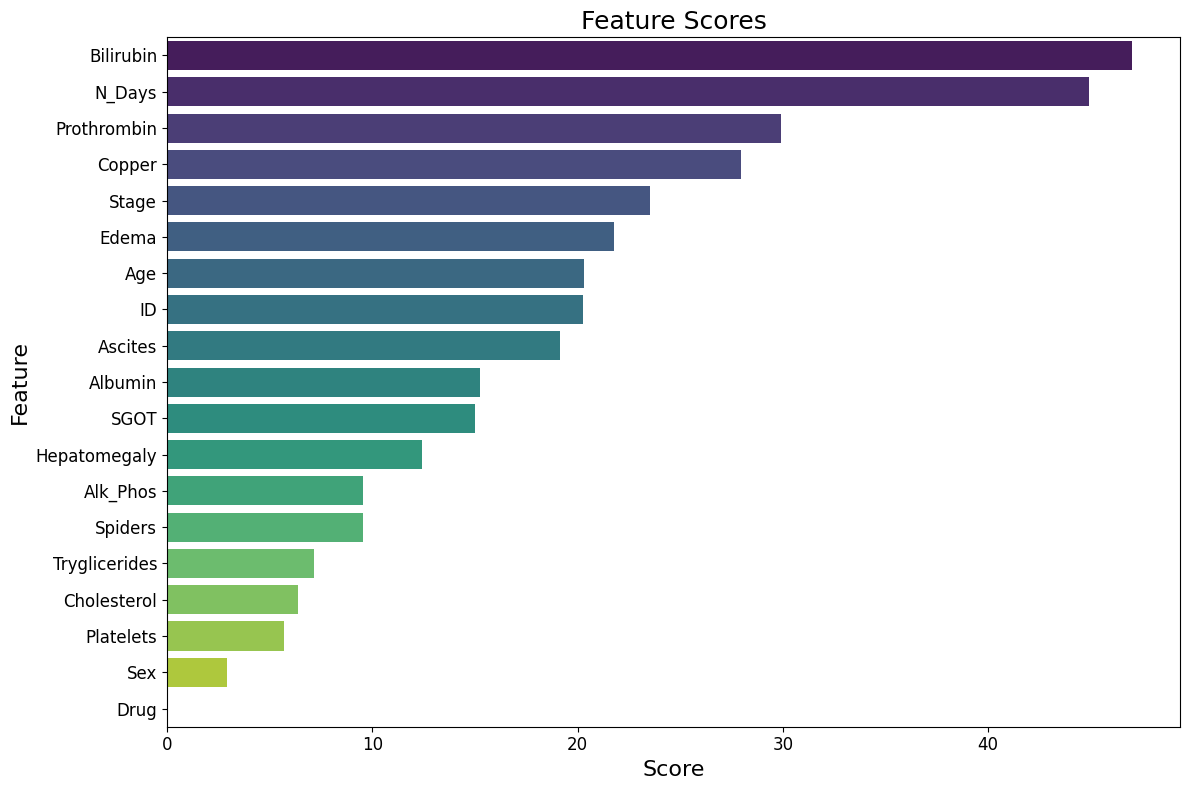

Feature scores:
          Feature      Score
9       Bilirubin  46.995281
1          N_Days  44.931475
17    Prothrombin  29.912836
12         Copper  27.967390
18          Stage  23.553323
8           Edema  21.757970
3             Age  20.323130
0              ID  20.285702
5         Ascites  19.157294
11        Albumin  15.260928
14           SGOT  14.994299
6    Hepatomegaly  12.428578
13       Alk_Phos   9.562595
7         Spiders   9.561905
15  Tryglicerides   7.183730
10    Cholesterol   6.386323
16      Platelets   5.713424
4             Sex   2.949460
2            Drug   0.012049


In [399]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest, f_classif

# Separate features (X) and target (y)
X = df.drop('Status', axis=1)  # Drop the target variable from features
y = df['Status']  # Target variable

# Initialize SelectKBest with the f_classif scoring function (for classification)
selector = SelectKBest(score_func=f_classif, k='all')  # 'all' to get scores for all features

# Fit selector to your data
selector.fit(X, y)

# Get feature scores
feature_scores = pd.DataFrame({'Feature': X.columns, 'Score': selector.scores_})

# Sort features by score in descending order
feature_scores = feature_scores.sort_values(by='Score', ascending=False)

# Plot feature scores
plt.figure(figsize=(12, 8))
sns.barplot(x='Score', y='Feature', data=feature_scores, palette='viridis')
plt.title('Feature Scores', fontsize=18)
plt.xlabel('Score', fontsize=16)
plt.ylabel('Feature', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

# Display the sorted feature scores
print("Feature scores:")
print(feature_scores)


***Keeping the threshold score as 10 feautures are selected***

In [400]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Assuming 'df' is your DataFrame and 'feature_score_df' contains your feature scores
# Example list of selected features based on scores
selected_features = ['N_Days', 'Hepatomegaly', 'Albumin', 'Stage', 'Prothrombin', 'Ascites', 'Edema', 'Spiders',
                      'Stage', 'Status']

# Extract the selected features from the DataFrame
df_selected = df[selected_features]

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the data
scaled_data = scaler.fit_transform(df_selected)

# Convert scaled data back to a DataFrame (if needed)
df_scaled = pd.DataFrame(scaled_data, columns=df_selected.columns)

# Check the scaled DataFrame
print(df_scaled.head())


     N_Days  Hepatomegaly   Albumin     Stage  Prothrombin   Ascites  \
0 -1.375612      0.755929 -2.114296  1.115988     1.442407  4.051749   
1  2.340341      0.755929  1.513818 -0.027353    -0.128736 -0.246807   
2 -0.820938     -1.322876 -0.041088  1.115988     1.246014 -0.246807   
3  0.006542      0.755929 -2.255651  1.115988    -0.423325 -0.246807   
4 -0.375023      0.755929  0.076708 -0.027353     0.165853 -0.246807   

      Edema   Spiders     Stage    Status  
0  3.553818  1.909043  1.115988  1.225441  
1 -0.396969  1.909043 -0.027353 -0.869587  
2  1.578425 -0.523823  1.115988  1.225441  
3  1.578425  1.909043  1.115988  1.225441  
4 -0.396969  1.909043 -0.027353  0.177927  


# **Models**

Here we have Status as the target variable

In [401]:
# Define X (features) and y (target)
X = df.drop(['Status'], axis=1)  # Exclude 'Stage' from features
y = df['Status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**1. Random Forset**

In [402]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Calculate accuracy on the training set
y_train_pred = model.predict(X_train)
training_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", training_accuracy)

# Define the number of folds for cross-validation
num_folds = 5

# Perform cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=num_folds)

# Calculate the mean cross-validation accuracy
validation_accuracy = cv_scores.mean()
print("Validation Accuracy:", validation_accuracy)

# Make predictions on the test set
y_test_pred = model.predict(X_test)

# Evaluate the model
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)

Training Accuracy: 1.0
Validation Accuracy: 0.775395748530077
Test Accuracy: 0.8333333333333334


**2. Logistic regression**

In [403]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report

# Assuming X_train, X_test, y_train, y_test are already defined and split
# Initialize the Logistic Regression classifier
logreg = LogisticRegression(max_iter=5000, random_state=42)

# Fit the classifier to the training data
logreg.fit(X_train, y_train)

# Predictions on the test set
y_pred = logreg.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Alternatively, you can use cross-validation to evaluate the model
cv_scores = cross_val_score(logreg, X_train, y_train, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Average CV Accuracy:", cv_scores.mean())

# Print classification report for detailed evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred))


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.86


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Cross-Validation Scores: [0.7761194  0.74626866 0.80597015 0.79104478 0.74242424]
Average CV Accuracy: 0.7723654454997739
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.95      0.90        44
           1       0.00      0.00      0.00         4
           2       0.86      0.83      0.85        36

    accuracy                           0.86        84
   macro avg       0.57      0.60      0.58        84
weighted avg       0.82      0.86      0.84        84



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels wit

**3. SVM**

In [404]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report

# Assuming X_train, X_test, y_train, y_test are already defined and split
# Initialize the SVM classifier
svm_classifier = SVC(kernel='rbf', random_state=42)

# Fit the classifier to the training data
svm_classifier.fit(X_train, y_train)

# Predictions on the test set
y_pred = svm_classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Alternatively, you can use cross-validation to evaluate the model
cv_scores = cross_val_score(svm_classifier, X_train, y_train, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Average CV Accuracy:", cv_scores.mean())

# Print classification report for detailed evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.80
Cross-Validation Scores: [0.7761194  0.76119403 0.79104478 0.74626866 0.75757576]
Average CV Accuracy: 0.7664405246494799
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.98      0.84        44
           1       0.00      0.00      0.00         4
           2       0.92      0.67      0.77        36

    accuracy                           0.80        84
   macro avg       0.55      0.55      0.54        84
weighted avg       0.78      0.80      0.77        84



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**4. xGBoost**

In [406]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report

# Initialize the XGBoost classifier
xgb_classifier = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=False, random_state=42)

# Fit the classifier to the training data
xgb_classifier.fit(X_train, y_train)

# Predictions on the test set
y_pred = xgb_classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Alternatively, you can use cross-validation to evaluate the model
cv_scores = cross_val_score(xgb_classifier, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", cv_scores)
print("Average CV Accuracy:", cv_scores.mean())

# Print classification report for detailed evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.90
Cross-Validation Scores: [0.7761194  0.82089552 0.86567164 0.7761194  0.74242424]
Average CV Accuracy: 0.7962460425146991
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.95      0.92        44
           1       1.00      0.25      0.40         4
           2       0.92      0.92      0.92        36

    accuracy                           0.90        84
   macro avg       0.94      0.71      0.75        84
weighted avg       0.91      0.90      0.90        84

